# Data Exploration

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Load dataset
cereal_df = pd.read_csv('cereal.csv')

In [65]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [66]:
# check data types of each columns
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [67]:
#extract only necessary columns
fields = ['weight','shelf','cups']
cereal_df_subset = cereal_df.drop(fields, axis=1) # axis = 1 = by columns
cereal_df_subset

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,51.592193


In [68]:
# find the correlation between pairs
cereal_corr = cereal_df_subset.corr(numeric_only=True) 
cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,-0.240544
rating,-0.689376,0.470618,-0.409284,-0.401295,0.584160,0.052055,-0.759675,0.380165,-0.240544,1.000000


In [69]:
#ones_like can build a matrix of booleans (True, False) with the same shape as our data
ones_corr =np.ones_like(cereal_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [70]:
ones_corr.shape, cereal_corr.shape

((10, 10), (10, 10))

In [71]:
# np's triu: return only upper triangle matrix because another is duplicated
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
         True]])

<Axes: >

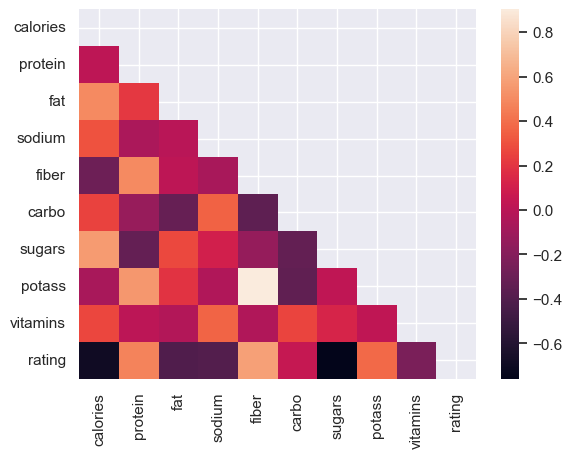

In [72]:
sns.heatmap(cereal_corr, mask=mask)

### When removing the upper tri-angle, here are still 2 empty cells in our matrix (calories & rating)

In [73]:
adjusted_mask = mask[1:, :-1]

In [74]:
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False, False]])

In [75]:
adjusted_cereal_corr = cereal_corr.iloc[1:, :-1]

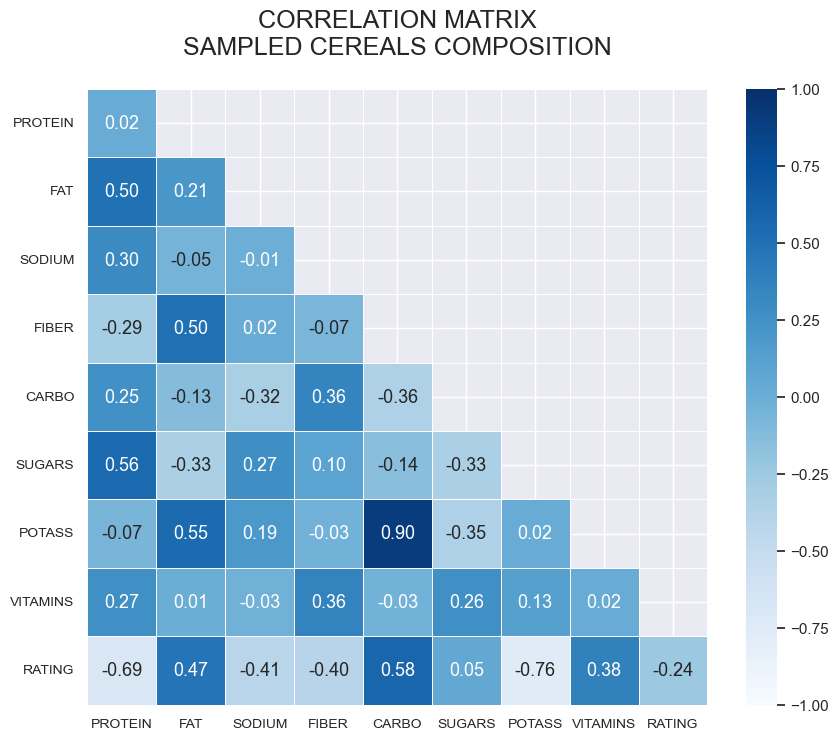

In [76]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(adjusted_cereal_corr, mask =adjusted_mask, xticklabels ='auto', annot = True, fmt='.2f', cmap ='Blues',
           vmin = -1, vmax = 1,annot_kws ={"fontsize":13}, linecolor = 'white', linewidth =0.5
           ); #fmt: limit decimals

yticks = [i.upper() for i in adjusted_cereal_corr.index];
xticks = [i.upper() for i in adjusted_cereal_corr.columns];

ax.set_yticklabels(yticks, rotation = 0, fontsize = 10);
ax.set_xticklabels(yticks,fontsize = 10);

title = 'CORRELATION MATRIX\nSAMPLED CEREALS COMPOSITION\n'
ax.set_title(title, loc='center', fontsize = 18);

`High corr: Carbo-Potass`

## Histograms for numeric features

In [92]:
cereal_df_subset.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating,type_H,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
0,100% Bran,70,4,1,130,10.0,5.0,6,280,25,68.402973,False,False,False,True,False,False,False
1,100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0,33.983679,False,False,False,False,False,True,False
2,All-Bran,70,4,1,260,9.0,7.0,5,320,25,59.425505,False,False,True,False,False,False,False
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25,93.704912,False,False,True,False,False,False,False
4,Almond Delight,110,2,2,200,1.0,14.0,8,-1,25,34.384843,False,False,False,False,False,False,True


In [93]:
numeric_cols = ['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']

In [94]:
print(cereal_df_subset[numeric_cols].describe())

         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins     rating  
count  77.000000   77.000000   77.000000  77.000000  
mean    6.922078   96.077922   28.246753  42.665705  
std     4.444885   71.286813   22.342523  14.047289  
min    -1.000000   -1.000000    0.000000  18.042851  
25%     3.000000   40.000000   25.00

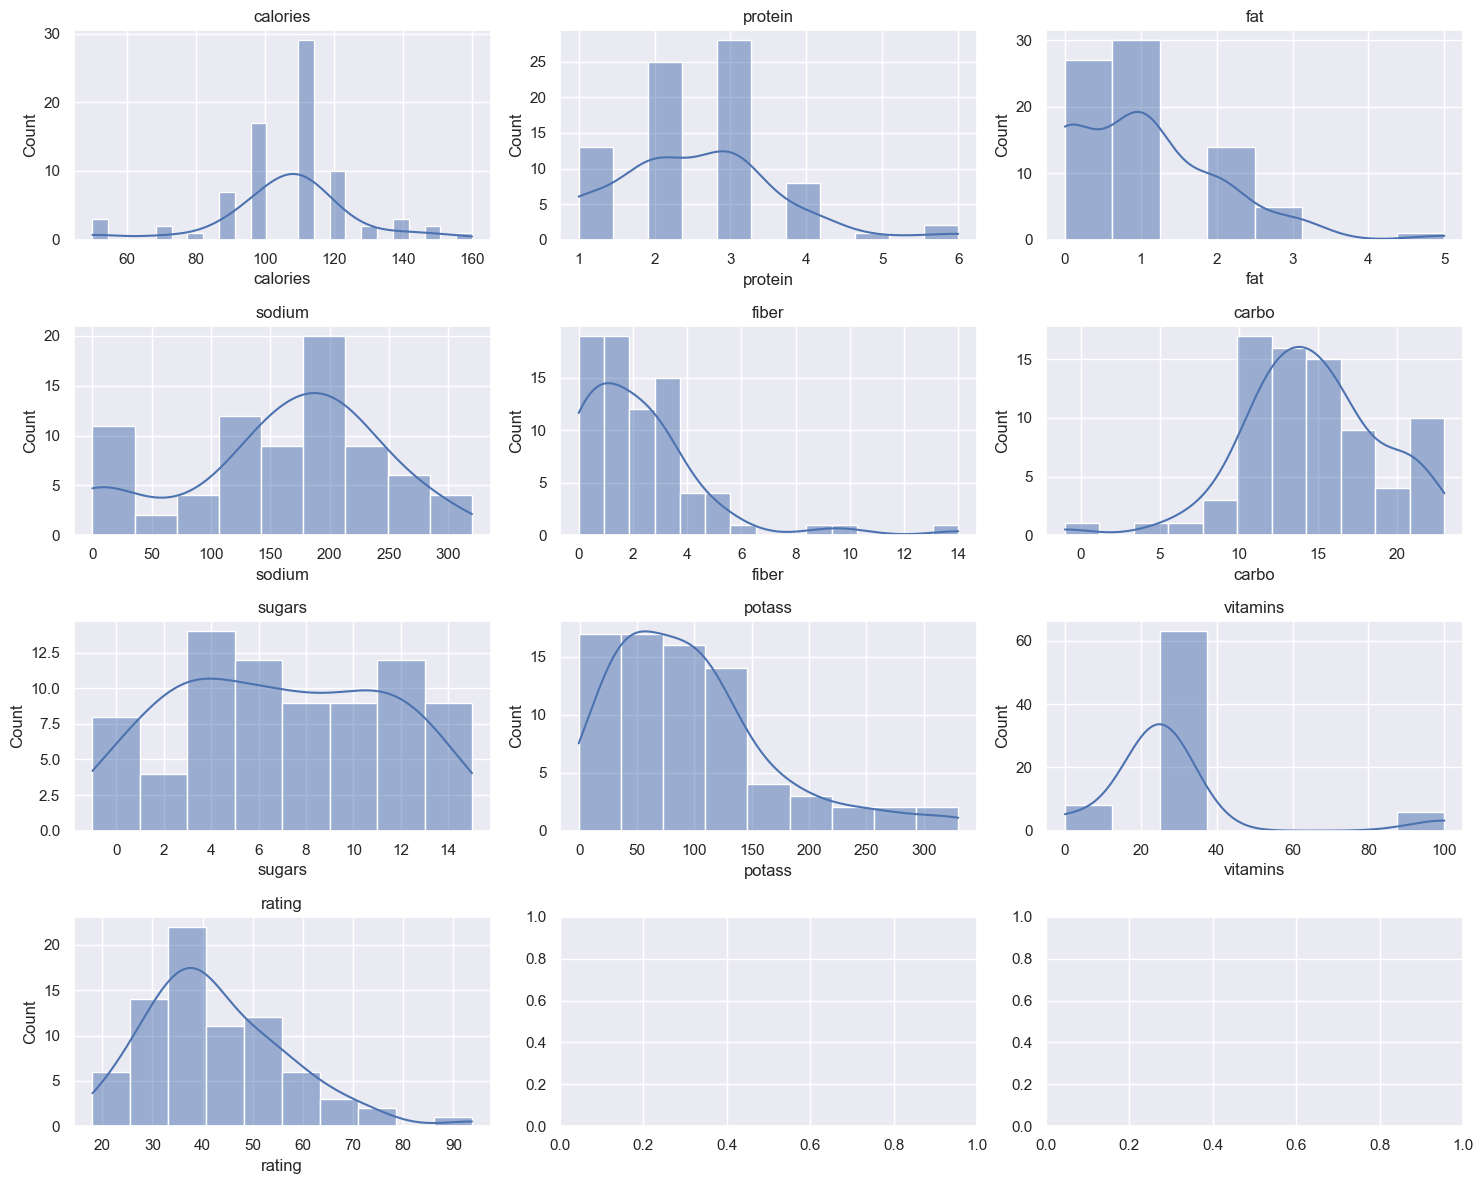

In [103]:
fig, axes = plt.subplots(4, 3, figsize=(15,12))  # 4 rows x 3 columns
axes = axes.flatten()

for i, col in enumerate(numeric_cols): #enumerate is used to create (or give you) an index while looping
    sns.histplot(cereal_df_subset[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

`Most of products focus on medium calories, high vitamins, high sugar.`

## Top 5 cereals by rating

In [122]:
top5 = cereal_df_subset.sort_values('rating', ascending=False).head(5)
top5_df = pd.DataFrame(top5[['name'] + numeric_cols])
top5_df

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25,93.704912
64,Shredded Wheat 'n'Bran,90,3,0,0,4.0,19.0,0,140,0,74.472949
65,Shredded Wheat spoon size,90,3,0,0,3.0,20.0,0,120,0,72.801787
0,100% Bran,70,4,1,130,10.0,5.0,6,280,25,68.402973
63,Shredded Wheat,80,2,0,0,3.0,16.0,0,95,0,68.235885


`Customers tend to rate the highest-scoring products as those with lower calories, higher protein, zero or low fat, higher fiber, lower carbohydrates and sugar, and higher levels of potassium and vitamins.`

--------------

# Prediction Rating based on nutritions

## Define target and predictors

`Target (y): rating (numeric, 0–100)`

`Predictors (X): nutritional values`

In [77]:
# Data processing: One-hot encode 'type'
cereal_df_subset = pd.get_dummies(cereal_df_subset, columns=['type', 'mfr'], drop_first=True)
cereal_df_subset.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating,type_H,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
0,100% Bran,70,4,1,130,10.0,5.0,6,280,25,68.402973,False,False,False,True,False,False,False
1,100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0,33.983679,False,False,False,False,False,True,False
2,All-Bran,70,4,1,260,9.0,7.0,5,320,25,59.425505,False,False,True,False,False,False,False
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25,93.704912,False,False,True,False,False,False,False
4,Almond Delight,110,2,2,200,1.0,14.0,8,-1,25,34.384843,False,False,False,False,False,False,True


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define predictors and target
X = cereal_df_subset[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']]
y = cereal_df_subset['rating']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R2: {r2:.2f}")

# Optional: feature importance (coefficients)
coefficients = pd.DataFrame({'feature': X.columns, 'coef': model.coef_})
print(coefficients)


MSE: 0.00, R2: 1.00
    feature      coef
0  calories -0.222724
1   protein  3.273174
2       fat -1.691408
3    sodium -0.054493
4     fiber  3.443480
5     carbo  1.092451
6    sugars -0.724895
7    potass -0.033993
8  vitamins -0.051212


`This result indicates overfitting due to the small dataset size. The model effectively memorizes the training data; however, it successfully demonstrates my approach to building and evaluating a predictive model.`

---

## THE END

Thank you for reviewing my testimony.  
Please let me know if you have any questions.

**Tran**